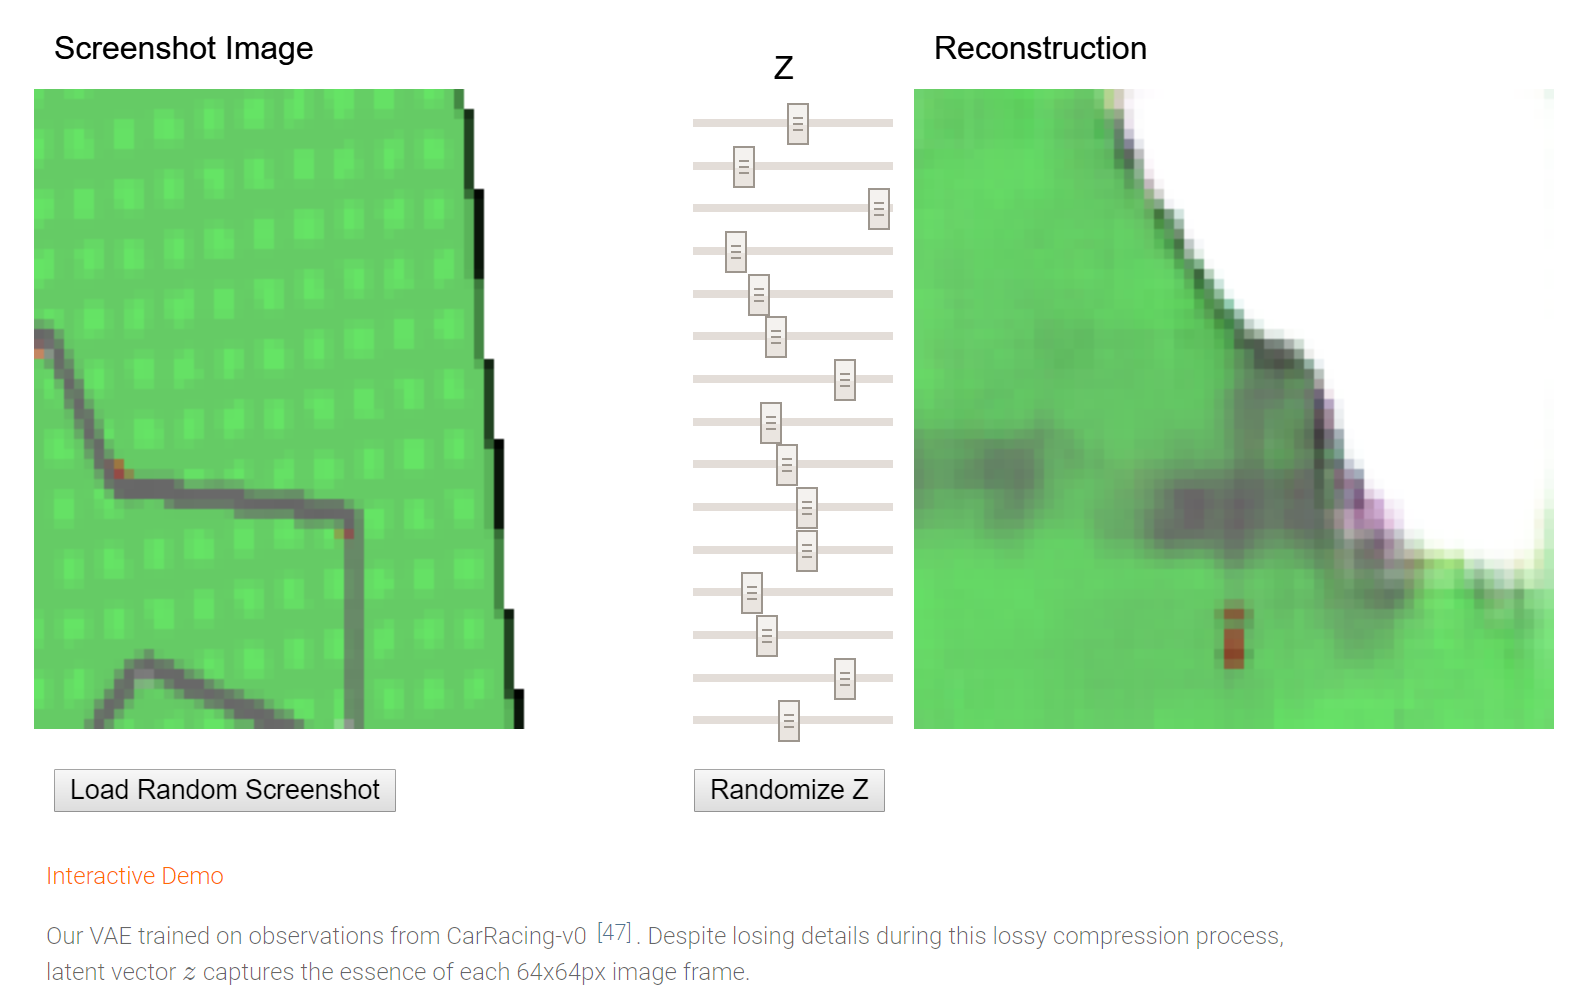

Can I do this tho?? https://worldmodels.github.io/

## Getting `input`, `output` and `z`

In [1]:
from pathlib import Path
vae_dir = Path('../../pytorch-text-vae') # https://github.com/iconix/pytorch-text-vae

%run -i $vae_dir/generate.py $vae_dir/reviews_sentences.pt reviews_sentences_stored_info.pkl --cache-path=$vae_dir/tmp

Namespace(cache_path='../../pytorch-text-vae/tmp', max_length=50, num_sample=10, saved_vae='../../pytorch-text-vae/reviews_sentences.pt', seed=None, stored_info='reviews_sentences_stored_info.pkl', temp=0.75, use_cuda=True)
Fetching cached info at ../../pytorch-text-vae/tmp/reviews_sentences_stored_info.pkl
Cache ../../pytorch-text-vae/tmp/reviews_sentences_stored_info.pkl loaded, total load time 0.5667359828948975
Found saved model ../../pytorch-text-vae/reviews_sentences.pt
Trained for 0 steps
Setting new random seed
---
that was UNK on the UNK UNK UNK gem
---
the music and and it has in all of the day
---
the UNK is back in the UNK with a UNK and recent vocals from gold
---
UNK UNK in some of it seems to make sure
---
one of his debut ep here at once again
---
it is produced by brooklyn based in facebook or know
---
the UNK on the UNK but its the the all of what we see
---
be sure to get into the track that she is into gem
---
like a remix of UNK along with a UNK remix i dont want t

In [2]:
z.size()

torch.Size([1, 128])

In [3]:
from torch.autograd import Variable

USE_CUDA = True

random_state = np.random.RandomState(1999)
#random_state.shuffle(pairs)

def word_tensor(lang, string):
    split_string = string.split(" ")
    size = len(split_string) + 1
    tensor = torch.zeros(size).long()
    for c in range(len(split_string)):
        tensor[c] = lang.word_to_index(split_string[c])
    tensor[-1] = EOS_token
    tensor = Variable(tensor)
    if USE_CUDA:
        tensor = tensor.cuda()
    return tensor

def random_training_set():
    pair_i = random_state.choice(len(pairs))
    pair = pairs[pair_i]
    inp = word_tensor(input_side, pair[0])
    target = word_tensor(output_side, pair[1])
    return inp, target

def interesting_training_set(i):
    idxs = [215756, 171570, 180940, 46796, 223238, 172800, 107093, 190686, 155344, 240450]
    pair = pairs[idxs[i]]
    inp = word_tensor(input_side, pair[0])
    target = word_tensor(output_side, pair[1])
    return inp, target

input, target = random_training_set()

input, target

(tensor([ 3.0000e+00,  4.6180e+03,  1.0548e+04,  1.1600e+02,  1.4000e+01,
          7.9180e+03,  1.0000e+01,  1.3419e+05,  5.0000e+00,  3.0000e+00,
          3.0673e+04,  5.0000e+00,  1.7690e+03,  4.0000e+00,  1.0883e+04,
          5.0000e+00,  1.5311e+04,  2.7000e+01,  1.1703e+04,  8.0000e+00,
          7.4260e+03,  1.5000e+01,  3.0000e+00,  1.3990e+03,  8.0630e+03,
          1.0000e+00], device='cuda:0'),
 tensor([ 8.0630e+03,  1.3990e+03,  3.0000e+00,  1.5000e+01,  7.4260e+03,
          8.0000e+00,  1.1703e+04,  2.7000e+01,  1.5311e+04,  5.0000e+00,
          1.0883e+04,  4.0000e+00,  1.7690e+03,  5.0000e+00,  3.0673e+04,
          3.0000e+00,  5.0000e+00,  1.3419e+05,  1.0000e+01,  7.9180e+03,
          1.4000e+01,  1.1600e+02,  1.0548e+04,  4.6180e+03,  3.0000e+00,
          1.0000e+00], device='cuda:0'))

In [4]:
def index_to_word(lang, top_i):
    return lang.index_to_word(top_i) + " "

def long_word_tensor_to_string(lang, t):
    s = ''
    for i in range(t.size(0)):
        top_i = t.data[i]
        s += index_to_word(lang, top_i)
    return s

long_word_tensor_to_string(input_side, input)

'the atmosphere crafted into this remix is mesmerising and the ebb and flow of percussion and acoustics all breathe in harmony with the beautiful vocals EOS '

In [5]:
temperature = 1.0

m, l, z, decoded = vae(input, target, temperature)

z.size(), decoded.size()

(torch.Size([1, 128]), torch.Size([26, 333336]))

In [6]:
output = torch.zeros(decoded.size(0))
for i, dist in enumerate(decoded):
    output[i] = vae.decoder.sample(dist, temperature)[1]
    
output

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


tensor([ 8063.,     2.,     3.,    15.,   967.,     3.,     3.,     3.,
            3.,     3.,     3.,     3.,  7918.,     3.,     3.,     3.,
            3.,   703.,     3.,   703.,     3.,     1.,     1.,     3.,
            3.,     1.])

In [7]:
# remove EOS_token
output = output[(output != EOS_token).nonzero()]
output

tensor([[ 8063.],
        [    2.],
        [    3.],
        [   15.],
        [  967.],
        [    3.],
        [    3.],
        [    3.],
        [    3.],
        [    3.],
        [    3.],
        [    3.],
        [ 7918.],
        [    3.],
        [    3.],
        [    3.],
        [    3.],
        [  703.],
        [    3.],
        [  703.],
        [    3.],
        [    3.],
        [    3.]])

In [8]:
long_word_tensor_to_string(output_side, output)[::-1]

' the the the track the track the the the the remix the the the the the the the along with the UNK vocals'

## Getting many `input`s, `output`s and `z`s

In [9]:
n_triples = 5

def get_triples(temp=1.0, i=None):
    with torch.no_grad():
        if i is None:
            input, target = random_training_set()
        else:
            input, target = interesting_training_set(i)

        print('input:', long_word_tensor_to_string(input_side, input))

        m, l, z, decoded = vae(input, target, temp)

        output = torch.zeros(decoded.size(0))
        for i, dist in enumerate(decoded):
            output[i] = vae.decoder.sample(dist, temp)[1]

        print('output:', long_word_tensor_to_string(output_side, output)[::-1])

        print(input.size(), output.size(), z.size())
    return input, output, z

triplets = np.empty((n_triples, 3), dtype=object)
for i in range(n_triples):
    triplets[i] = get_triples(i=i)
    
triplets.shape

input: on his soulfully introspective new album EOS 
output:  EOS on his soulfully introspective new album
torch.Size([7]) torch.Size([7]) torch.Size([1, 128])
input: stream the remix below you dig EOS 
output:  EOS stream the remix below you dig
torch.Size([7]) torch.Size([7]) torch.Size([1, 128])
input: you can swoop this one from itunes here EOS 
output:  EOS you can swoop this this from itunes here
torch.Size([9]) torch.Size([9]) torch.Size([1, 128])
input: we cant wait to hear more EOS 
output:  EOS we cant wait to hear more
torch.Size([7]) torch.Size([7]) torch.Size([1, 128])
input: stream the track below and enjoy EOS 
output:  EOS stream the track below and enjoy
torch.Size([7]) torch.Size([7]) torch.Size([1, 128])


/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


(5, 3)

In [10]:
from sklearn.decomposition import PCA

zs = np.squeeze(np.array([t[2].cpu().numpy() for t in triplets]), axis=1)
pca = PCA(n_triples)
pca_zs = pca.fit_transform(zs)
pca_zs

array([[-1.3373715e+01, -7.5302258e+00, -7.2809248e+00, -1.1253664e-01,
         9.9055796e-07],
       [-1.9303912e+00,  1.1092128e+01,  1.4499134e+00,  8.2882347e+00,
         9.9055808e-07],
       [-2.1394722e+00, -4.4347987e+00,  1.3720533e+01, -2.7689252e+00,
         9.9055831e-07],
       [ 1.3835789e+01, -8.9883041e+00, -3.5936401e+00,  2.7451043e+00,
         9.9055831e-07],
       [ 3.6077874e+00,  9.8612089e+00, -4.2958803e+00, -8.1518774e+00,
         9.9055774e-07]], dtype=float32)

In [11]:
pca.explained_variance_ratio_

array([3.2793784e-01, 3.1607577e-01, 2.3006932e-01, 1.2591705e-01,
       4.1084033e-15], dtype=float32)

In [12]:
# pca reconstruction https://stats.stackexchange.com/a/229093
np.dot(pca_zs, pca.components_) + np.mean(zs, axis=0)

array([[-7.42285371e-01, -8.15178752e-02,  6.22073174e-01,
         1.46142340e+00, -2.79027987e+00, -1.21925282e+00,
        -1.66973221e+00, -2.74646616e+00,  2.94698238e+00,
        -2.17700720e+00, -3.35738897e+00, -1.82704830e+00,
         1.00341737e+00, -4.51718330e-01, -2.37036037e+00,
         2.30485559e+00,  3.04773498e+00, -8.50785613e-01,
        -3.27918589e-01, -1.79052234e-01, -1.20478439e+00,
         1.05954862e+00, -2.14422345e+00,  6.81467533e-01,
         6.13216758e-01, -1.39921355e+00, -2.93811917e+00,
        -9.43793476e-01,  3.71615410e-01,  1.21833277e+00,
         1.05703712e+00, -3.75746012e-01,  2.08660030e+00,
        -7.52582371e-01,  3.11476916e-01,  1.30120540e+00,
        -3.43624592e-01, -1.30884027e+00,  9.57006693e-01,
        -1.12459767e+00, -9.15799916e-01,  9.43679214e-02,
        -2.29740953e+00, -2.67663074e+00, -1.41678023e+00,
         5.02879024e-01,  1.59457171e+00, -4.19047475e-02,
        -1.93389094e+00,  6.64450765e-01,  1.04346466e+0

In [13]:
zs

array([[-7.42285728e-01, -8.15176070e-02,  6.22072935e-01,
         1.46142268e+00, -2.79027915e+00, -1.21925235e+00,
        -1.66973245e+00, -2.74646521e+00,  2.94698191e+00,
        -2.17700696e+00, -3.35738873e+00, -1.82704699e+00,
         1.00341797e+00, -4.51718211e-01, -2.37035847e+00,
         2.30485535e+00,  3.04773378e+00, -8.50785494e-01,
        -3.27919096e-01, -1.79052413e-01, -1.20478404e+00,
         1.05954778e+00, -2.14422321e+00,  6.81467295e-01,
         6.13216519e-01, -1.39921296e+00, -2.93811893e+00,
        -9.43793476e-01,  3.71614605e-01,  1.21833265e+00,
         1.05703676e+00, -3.75746250e-01,  2.08659959e+00,
        -7.52582252e-01,  3.11477244e-01,  1.30120552e+00,
        -3.43624294e-01, -1.30884063e+00,  9.57006812e-01,
        -1.12459755e+00, -9.15799558e-01,  9.43675637e-02,
        -2.29740930e+00, -2.67663026e+00, -1.41678047e+00,
         5.02879024e-01,  1.59457064e+00, -4.19045091e-02,
        -1.93389034e+00,  6.64450586e-01,  1.04346442e+0

## Tweak a reduced-dimension and see what happens

In [14]:
pca_zs

array([[-1.3373715e+01, -7.5302258e+00, -7.2809248e+00, -1.1253664e-01,
         9.9055796e-07],
       [-1.9303912e+00,  1.1092128e+01,  1.4499134e+00,  8.2882347e+00,
         9.9055808e-07],
       [-2.1394722e+00, -4.4347987e+00,  1.3720533e+01, -2.7689252e+00,
         9.9055831e-07],
       [ 1.3835789e+01, -8.9883041e+00, -3.5936401e+00,  2.7451043e+00,
         9.9055831e-07],
       [ 3.6077874e+00,  9.8612089e+00, -4.2958803e+00, -8.1518774e+00,
         9.9055774e-07]], dtype=float32)

In [15]:
pca_zs[0]

array([-1.3373715e+01, -7.5302258e+00, -7.2809248e+00, -1.1253664e-01,
        9.9055796e-07], dtype=float32)

In [16]:
pca.components_.shape

(5, 128)

In [17]:
def reconstruct(reduced):
    return np.dot(reduced, pca.components_) + np.mean(zs, axis=0)

reconstruct(pca_zs[0])

array([-7.4228537e-01, -8.1517816e-02,  6.2207317e-01,  1.4614232e+00,
       -2.7902801e+00, -1.2192527e+00, -1.6697323e+00, -2.7464662e+00,
        2.9469824e+00, -2.1770070e+00, -3.3573890e+00, -1.8270481e+00,
        1.0034174e+00, -4.5171833e-01, -2.3703601e+00,  2.3048556e+00,
        3.0477347e+00, -8.5078549e-01, -3.2791853e-01, -1.7905223e-01,
       -1.2047844e+00,  1.0595486e+00, -2.1442235e+00,  6.8146753e-01,
        6.1321676e-01, -1.3992133e+00, -2.9381192e+00, -9.4379348e-01,
        3.7161541e-01,  1.2183328e+00,  1.0570370e+00, -3.7574577e-01,
        2.0866003e+00, -7.5258231e-01,  3.1147692e-01,  1.3012055e+00,
       -3.4362471e-01, -1.3088403e+00,  9.5700669e-01, -1.1245975e+00,
       -9.1579980e-01,  9.4367921e-02, -2.2974098e+00, -2.6766310e+00,
       -1.4167804e+00,  5.0287914e-01,  1.5945717e+00, -4.1904777e-02,
       -1.9338909e+00,  6.6445082e-01,  1.0434647e+00, -1.1141825e+00,
       -5.3564155e-01, -1.8943299e+00,  3.1337708e-01,  6.7523682e-01,
      

In [18]:
# tweak first dimension of reduction
#print('before:', pca_zs[0][0])
#pca_zs[0][0] = -100 #+= pca_zs[0][0] #* -1
#print('after:', pca_zs[0][0])

In [19]:
tweaked_z = reconstruct(pca_zs[0])
tweaked_z

array([-7.4228537e-01, -8.1517816e-02,  6.2207317e-01,  1.4614232e+00,
       -2.7902801e+00, -1.2192527e+00, -1.6697323e+00, -2.7464662e+00,
        2.9469824e+00, -2.1770070e+00, -3.3573890e+00, -1.8270481e+00,
        1.0034174e+00, -4.5171833e-01, -2.3703601e+00,  2.3048556e+00,
        3.0477347e+00, -8.5078549e-01, -3.2791853e-01, -1.7905223e-01,
       -1.2047844e+00,  1.0595486e+00, -2.1442235e+00,  6.8146753e-01,
        6.1321676e-01, -1.3992133e+00, -2.9381192e+00, -9.4379348e-01,
        3.7161541e-01,  1.2183328e+00,  1.0570370e+00, -3.7574577e-01,
        2.0866003e+00, -7.5258231e-01,  3.1147692e-01,  1.3012055e+00,
       -3.4362471e-01, -1.3088403e+00,  9.5700669e-01, -1.1245975e+00,
       -9.1579980e-01,  9.4367921e-02, -2.2974098e+00, -2.6766310e+00,
       -1.4167804e+00,  5.0287914e-01,  1.5945717e+00, -4.1904777e-02,
       -1.9338909e+00,  6.6445082e-01,  1.0434647e+00, -1.1141825e+00,
       -5.3564155e-01, -1.8943299e+00,  3.1337708e-01,  6.7523682e-01,
      

In [20]:
def generate(z, n_iter, temp):
    if USE_CUDA:
        z = torch.tensor(z).unsqueeze(0).cuda()
    decoded = vae.decoder.generate(z, n_iter, temp, USE_CUDA)
    output = torch.zeros(decoded.size(0))
    for i, dist in enumerate(decoded):
        output[i] = vae.decoder.sample(dist, temp)[1]

    #output = output[(output != EOS_token).nonzero()]
    
    return output

In [21]:
tweaked_output = generate(tweaked_z, len(triplets[0][1]), temperature)
long_word_tensor_to_string(output_side, tweaked_output)[::-1]

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' EOS on his soulfully introspective new album'

In [22]:
long_word_tensor_to_string(input_side, torch.tensor(triplets[0][0])), long_word_tensor_to_string(output_side, torch.tensor(triplets[0][1]))[::-1]

('on his soulfully introspective new album EOS ',
 ' EOS on his soulfully introspective new album')

## Get 5 samples with best reconstruction error for demo

In [23]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
if USE_CUDA:
    criterion.cuda()

In [24]:
#criterion(tweaked_decoded, torch.LongTensor(triplets[0][1]).cuda())

In [25]:
import time
start = time.time()
nlls = []
for pair in pairs:
    inp = word_tensor(input_side, pair[0])
    tgt = word_tensor(output_side, pair[1])
    _, _, _, dec = vae(inp, tgt, temperature)
    
    if USE_CUDA:
        dec = dec.cuda()
        tgt = tgt.cuda()
    
    nlls.append(criterion(dec, tgt).item())

print(f'runtime: {time.time() - start:.2f}s')
nlls

runtime: 7652.00s


[5.291698932647705,
 4.835587501525879,
 5.486178398132324,
 2.904616355895996,
 4.231718063354492,
 6.166951656341553,
 4.268766403198242,
 6.487578868865967,
 5.819698810577393,
 4.343570709228516,
 4.403513431549072,
 6.629238605499268,
 4.536174774169922,
 3.3129591941833496,
 5.345408916473389,
 5.101085186004639,
 6.50642204284668,
 5.3166184425354,
 5.153810501098633,
 7.25409460067749,
 7.525333881378174,
 4.718029975891113,
 7.029505252838135,
 6.636122703552246,
 5.195293426513672,
 5.976142406463623,
 2.9931204319000244,
 4.131786346435547,
 5.823956489562988,
 6.246203899383545,
 4.096710205078125,
 4.6120123863220215,
 4.988720893859863,
 6.479323387145996,
 5.711531639099121,
 4.586363315582275,
 7.352790832519531,
 4.907199859619141,
 4.457612991333008,
 5.554548263549805,
 4.865270137786865,
 4.397754669189453,
 7.171889305114746,
 5.253253936767578,
 6.177927494049072,
 4.9478583335876465,
 4.3452911376953125,
 4.0306010246276855,
 4.6098785400390625,
 4.34569358825683

In [32]:
min_idxs = np.array(nlls).argsort()[1000:2000]
min_idxs

array([202748, 173846, 205583, 134726, 216806, 156757,  15252,  44007,
       210627,   9125, 196373, 123177, 120599, 107276, 175570, 202542,
       215170, 183834, 140225, 164761, 139166, 153075, 167038, 184527,
       190756, 162204, 216053, 105966, 170674, 186592, 152065, 194687,
       226807, 125640, 105716, 177483,  55000, 222708,  67795, 214438,
        36794,  61283, 113422, 222573, 158788, 198549, 165175,  53260,
       141015, 137087, 145164, 169961, 213609,  11998, 143921, 119155,
       202698, 200697, 155487,  34866, 139706, 147835, 136146, 208047,
        68688, 104745, 122082, 200195,   4343, 216999,  32981, 238722,
       216943, 172562, 159023,  42520, 200694, 183849,   7315, 124593,
       146765,  54506, 144613,   6286, 166863, 178778, 143051, 150979,
       157673, 187892, 131791, 212351,  11206, 136947, 177723,  77392,
       180345, 138927, 170754, 109076, 224099, 181818, 173565, 184096,
       143244, 218407, 171978, 245196, 120898,  37383,  49267, 164851,
      

In [33]:
[(pairs[min_idxs[i]], nlls[min_idxs[i]], min_idxs[i]) for i in range(len(min_idxs))]

[(('after its release ron ron shoreline mafia 03 greedo and',
   'dna odeerg 30 aifam enilerohs nor nor esaeler sti retfa'),
  0.4086308181285858,
  202748),
 (('you can listen to it below', 'woleb ti ot netsil nac uoy'),
  0.40866485238075256,
  173846),
 (('xxxtentacion leaves behind a complicated tragic legacy',
   'ycagel cigart detacilpmoc a dniheb sevael noicatnetxxx'),
  0.40869367122650146,
  205583),
 (('if you are the owner of a sound file and would like it removed please email us here',
   'ereh su liame esaelp devomer ti ekil dluow dna elif dnuos a fo renwo eht era uoy fi'),
  0.408740371465683,
  134726),
 (('check out405 radio or our new music section',
   'noitces cisum wen ruo ro oidar 504tuo kcehc'),
  0.40923839807510376,
  216806),
 (('on his soulfully introspective new album',
   'mubla wen evitcepsortni yllufluos sih no'),
  0.4094081521034241,
  156757),
 (('if not check it out here', 'ereh tuo ti kcehc ton fi'),
  0.41062504053115845,
  15252),
 (('this entry was

**"interesting"** sentences:
- 'on his soulfully introspective new album' (215756)
- 'stream the remix below you dig' (171570)
- 'you can swoop this one from itunes here' (180940)
- 'we cant wait to hear more' (46796)
- 'stream the track below and enjoy' (223238)


- 'you can stream the remix below' (172800)
- 'check out the new song below' (107093)
- 'check out the new remix below' (190686)
- 'you can grab a free download here' (155344)
- 'take a listen to it below' (240450)

**CLEAN UP**:
- remove "socialize with _artist_ via the following"
- remove "xxxtentacion leaves behind a complicated tragic legacy" (why so many instances?)

**IDEA**: note repetitive styles and formatting ("soulfully introspective new album") found by looking at lowest reconstruction errors

In [23]:
[pairs[i] for i in [215756, 171570, 180940, 46796, 223238, 172800, 107093, 190686, 155344, 240450]]

[('on his soulfully introspective new album',
  'mubla wen evitcepsortni yllufluos sih no'),
 ('stream the remix below you dig', 'gid uoy woleb ximer eht maerts'),
 ('you can swoop this one from itunes here',
  'ereh senuti morf eno siht poows nac uoy'),
 ('we cant wait to hear more', 'erom raeh ot tiaw tnac ew'),
 ('stream the track below and enjoy', 'yojne dna woleb kcart eht maerts'),
 ('you can stream the remix below', 'woleb ximer eht maerts nac uoy'),
 ('check out the new song below', 'woleb gnos wen eht tuo kcehc'),
 ('check out the new remix below', 'woleb ximer wen eht tuo kcehc'),
 ('you can grab a free download here', 'ereh daolnwod eerf a barg nac uoy'),
 ('take a listen to it below', 'woleb ti ot netsil a ekat')]

In [24]:
long_word_tensor_to_string(input_side, torch.tensor(triplets[0][0]))

'on his soulfully introspective new album EOS '

## Exploring `z`s

In [106]:
temperature = 0.2

def shift_z(z, dim=None, n=None, recon=True):
    tweaked_z = np.copy(z)
    if dim is not None and n is not None:
        tweaked_z[dim] = n
    if recon:
        reconstructed_z = reconstruct(tweaked_z)
    else:
        reconstructed_z = tweaked_z
    tweaked_output = generate(reconstructed_z, len(triplets[0][1]), temperature)
    return long_word_tensor_to_string(output_side, tweaked_output)[::-1]

shift_z(pca_zs[0]), long_word_tensor_to_string(input_side, torch.tensor(triplets[0][0])), long_word_tensor_to_string(output_side, torch.tensor(triplets[0][1]))[::-1]

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


(' EOS on his soulfully introspective new album',
 'on his soulfully introspective new album EOS ',
 ' EOS on his soulfully introspective new album')

In [26]:
pca_zs[0]

array([-1.3373715e+01, -7.5302258e+00, -7.2809248e+00, -1.1253664e-01,
        9.9055796e-07], dtype=float32)

In [27]:
shift_z(pca_zs[0], 0, -32)

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' on on his soulfully introspective new album'

- `shift_z(pca_zs[0], 0, -29) -> shift_z(pca_zs[0], 0, -31)`: ' his on on soulfully introspective new album'
- `shift_z(pca_zs[0], 0, -24) -> shift_z(pca_zs[0], 0, -28)`: ' EOS on on soulfully introspective new album'
- `shift_z(pca_zs[0], 0, -5) -> shift_z(pca_zs[0], 0, -23)`: ' EOS on his soulfully introspective new album'
- `shift_z(pca_zs[0], 0, -4)`: ' EOS on his soulfully introspective new songs'
- `shift_z(pca_zs[0], 0, -2) -> shift_z(pca_zs[0], 0, -3)`: ' EOS on his soulfully introspective new tracks'
- `shift_z(pca_zs[0], 0, -1)`: ' EOS will be a brand new tracks'
- `shift_z(pca_zs[0], 0, 0)`: ' EOS EOS will be a new more'
- `shift_z(pca_zs[0], 0, 1)`: ' EOS EOS UNK continues to hear more'

In [28]:
def shift_z_range(z, dim, r=10):
    tweaked_z = np.copy(z)
    original_val = z[dim]
    for i in range(int(original_val) - r, int(original_val) + r):
        tweaked_z[dim] = i
        reconstructed_z = reconstruct(tweaked_z)
        tweaked_output = generate(reconstructed_z, len(triplets[0][1]), temperature)
        print(long_word_tensor_to_string(output_side, tweaked_output)[::-1], (dim, i))
        
shift_z_range(pca_zs[0], 0)

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


 EOS on his soulfully introspective new album (0, -23)
 EOS on his soulfully introspective new album (0, -22)
 EOS on his soulfully introspective new album (0, -21)
 EOS on his soulfully introspective new album (0, -20)
 EOS on his soulfully introspective new album (0, -19)
 EOS on his soulfully introspective new album (0, -18)
 EOS on his soulfully introspective new album (0, -17)
 EOS on his soulfully introspective new album (0, -16)
 EOS on his soulfully introspective new album (0, -15)
 EOS on his soulfully introspective new album (0, -14)
 EOS on his soulfully introspective new album (0, -13)
 EOS on his soulfully introspective new album (0, -12)
 EOS on his soulfully introspective new album (0, -11)
 EOS on his soulfully introspective new album (0, -10)
 EOS on his soulfully introspective new album (0, -9)
 EOS on his soulfully introspective new album (0, -8)
 EOS on his soulfully introspective new album (0, -7)
 EOS on his soulfully introspective new album (0, -6)
 EOS on his so

In [29]:
def shift_z_auto(z, dim, num_changes=5):
    tweaked_z = np.copy(z)
    original_val = z[dim]
    
    num_up_changes = 0
    num_down_changes = 0
    step_size = 1
    output = generate(reconstruct(z), len(triplets[0][1]), temperature)
    print(long_word_tensor_to_string(output_side, output)[::-1], (dim, original_val))
    print('---')
    
    new_dims = []
    
    while num_up_changes < num_changes:
        tweaked_z[dim] += step_size
        reconstructed_z = reconstruct(tweaked_z)
        tweaked_output = generate(reconstructed_z, len(triplets[0][1]), temperature)
        if not torch.eq(output, tweaked_output).all():
            print(long_word_tensor_to_string(output_side, tweaked_output)[::-1], (dim, tweaked_z[dim]))
            new_dims.append((dim, tweaked_z[dim]))
            output = tweaked_output
            num_up_changes += 1
        
    print('---')
        
    tweaked_z[dim] = original_val
    output = generate(reconstruct(z), len(triplets[0][1]), temperature)
    while num_down_changes < num_changes:
        tweaked_z[dim] -= step_size
        reconstructed_z = reconstruct(tweaked_z)
        tweaked_output = generate(reconstructed_z, len(triplets[0][1]), temperature)
        if not torch.eq(output, tweaked_output).all():
            print(long_word_tensor_to_string(output_side, tweaked_output)[::-1], (dim, tweaked_z[dim]))
            new_dims.append((dim, tweaked_z[dim]))
            output = tweaked_output
            num_down_changes += 1
            
    new_dims.append((dim, original_val, 'o'))
    new_dims.sort(key=lambda x: x[1])
    return new_dims
        
shift_z_auto(pca_zs[0], 0)

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


 EOS on his soulfully introspective new album (0, -13.373715)
---
 EOS he is a brand new tracks (0, -3.3737154)
 EOS EOS UNK is more new tracks (0, -1.3737154)
 EOS EOS cant wait to hear more (0, -0.3737154)
 EOS we cant wait to hear more (0, 0.6262846)
 wait we cant wait to hear more (0, 27.626286)
---
 on on his soulfully introspective new album (0, -29.373714)
 on his on introspective new album album (0, -36.373714)
 on on new album new album album (0, -41.373714)
 on on electronic new album album album (0, -47.373714)
 his on album new album album album (0, -50.373714)


[(0, -50.373714),
 (0, -47.373714),
 (0, -41.373714),
 (0, -36.373714),
 (0, -29.373714),
 (0, -13.373715, 'o'),
 (0, -3.3737154),
 (0, -1.3737154),
 (0, -0.3737154),
 (0, 0.6262846),
 (0, 27.626286)]

In [30]:
def shift_z_auto_dim(z, num_changes=5):
    new_dims = []
    for dim in range(z.shape[0]):
        new_dims.append(shift_z_auto(z, dim, num_changes))
        print('===')
        
    return new_dims
        
pt0 = shift_z_auto_dim(pca_zs[0])

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


 EOS on his soulfully introspective new album (0, -13.373715)
---
 EOS he is a brand new tracks (0, -3.3737154)
 EOS EOS UNK is more new tracks (0, -1.3737154)
 EOS EOS cant wait to hear more (0, -0.3737154)
 EOS we cant wait to hear more (0, 0.6262846)
 wait we cant wait to hear more (0, 27.626286)
---
 on on his soulfully introspective new album (0, -29.373714)
 on his on introspective new album album (0, -36.373714)
 on on new album new album album (0, -41.373714)
 on on electronic new album album album (0, -47.373714)
 his on album new album album album (0, -50.373714)
===
 EOS on his soulfully introspective new album (1, -7.5302258)
---
 EOS EOS on his new album below (1, 0.46977425)
 EOS EOS on on new album below (1, 1.4697742)
 EOS EOS out on new link below (1, 2.4697742)
 EOS the remix below and link below (1, 6.4697742)
 EOS on the remix below link below (1, 9.469774)
---
 is on his soulfully introspective new album (1, -14.530226)
 EOS who is his introspective new album (1, -

In [31]:
shift_z(np.array([-12.642205, -8.829542, -6.597306, 0.4293958, 7.782877e-07], dtype='float32'))

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' EOS on his soulfully introspective new album'

In [36]:
#import itertools

pt0 = [[-12.642205, -3.6422052, 4.357795], [-8.829542, -0.82954216, 9.170458], [-12.597305, -6.597306, 6.402694], [-14.570604, 0.4293958, 12.429396], [-21.0, -15.999999, 7.782877e-07]]
#ex0 = list(itertools.product(*pt0))

# http://code.activestate.com/recipes/496807-list-of-all-combination-from-multiple-lists/
ex0 = [[]]
for x in pt0:
    ex0 = [ j + [(i, y)] for i,y in enumerate(x) for j in ex0 ]

ex0

[[(0, -12.642205),
  (0, -8.829542),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (0, -8.829542),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795), (0, -8.829542), (0, -12.597305), (0, -14.570604), (0, -21.0)],
 [(0, -12.642205),
  (1, -0.82954216),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (1, -0.82954216),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795),
  (1, -0.82954216),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(0, -12.642205),
  (2, 9.170458),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (2, 9.170458),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795), (2, 9.170458), (0, -12.597305), (0, -14.570604), (0, -21.0)],
 [(0, -12.642205),
  (0, -8.829542),
  (1, -6.597306),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (0, -8.829542),
  (1, -6.597306),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795), (0, -8.829542)

In [71]:
a = [e[0] for e in ex0[0]]
out0[[np.array(b) for b in a]]

'00000'

In [72]:
out0 = np.zeros((3, 3, 3, 3, 3), dtype=object)
for ee in ex0:
    gen = shift_z(np.array([e[1] for e in ee], dtype='float32'))
    out0[[np.array(idx) for idx in [e[0] for e in ee]]] = gen
    
out0

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


array([[[[[' EOS EOS well and and new UNK',
           ' EOS EOS well and and new track',
           ' EOS on and soulfully introspective new track'],
          [' EOS is on his introspective new album',
           ' EOS is on his introspective new album',
           ' EOS on his soulfully introspective new album'],
          [' EOS EOS his is really come back',
           ' EOS EOS UNK is got his album',
           ' on his voice is his new album']],

         [[' she is on and and new UNK', ' she is on and and new UNK',
           ' EOS on and soulfully introspective new track'],
          [' EOS she is on his new UNK',
           ' EOS is on his introspective new album',
           ' EOS on his soulfully introspective new album'],
          [' EOS EOS UNK is got his album',
           ' EOS EOS his is released his album',
           ' EOS his voice is his new album']],

         [[' EOS well and this on facebook UNK',
           ' EOS and on this new album UNK',
           ' and new

In [75]:
out0_default = [0, 0, 1, 1, 2]
out0[[np.array(idx) for idx in out0_default]]

' EOS on his soulfully introspective new album'

Favorites:

0:
- EOS on his soulfully introspective new album (0, -12.642205)
- EOS on his soulfully introspective new tracks (0, -3.6422052)
- EOS we cant wait to hear more (0, 4.357795)

1:
- EOS on his soulfully introspective new album (1, -8.829542)
- EOS this is on his new album (1, -0.82954216)
- is on his remix from itunes here (1, 9.170458)

2:
- EOS on his soulfully introspective new album (2, -6.597306)
- EOS EOS is out on new synths (2, 6.402694)
- EOS he is on his new album (2, -12.597305)

3:
- EOS on his soulfully introspective new album (3, 0.4293958)
- EOS EOS UNK is on his remix (3, 12.429396)
- and on his soulfully introspective new album (3, -14.570604)

4:
- EOS on his soulfully introspective new album (4, 7.782877e-07)
- on his album was a new album (4, -15.999999)
- this album was a new album called (4, -21.0)

In [404]:
tweaked_z = np.copy(pca_zs[0])
tweaked_z[0] = -3.6422052
tweaked_z[1] = -4.829542
shift_z(tweaked_z)

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' EOS he is on his new tracks'

In [397]:
shift_z_auto_dim(pca_zs[1])

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


 EOS stream the remix below you dig (0, -2.6713827)
---
 EOS stream the stream below you dig (0, 9.328617)
 EOS stream the you below you dig (0, 11.328617)
 EOS stream the you below you hear (0, 13.328617)
 the stream below you below you hear (0, 17.328617)
 we cant hear you below you hear (0, 19.328617)
---
 EOS EOS stream the remix you dig (0, -8.671383)
 EOS stream the remix remix you dig (0, -12.671383)
 EOS EOS the remix remix you dig (0, -13.671383)
 EOS EOS the remix on you dig (0, -14.671383)
 EOS EOS the remix remix on dig (0, -16.671383)
===
 EOS stream the remix below you dig (1, 4.156804)
---
 you EOS stream the remix you dig (1, 13.156804)
 EOS you stream this remix you dig (1, 15.156804)
 EOS you from this remix you dig (1, 19.156803)
 get you from this remix you dig (1, 22.156803)
 you you from this remix you dig (1, 25.156803)
---
 EOS EOS the remix below you dig (1, -5.843196)
 EOS EOS the remix below we make (1, -12.843196)
 EOS EOS EOS out below we make (1, -18.84319

Favorites:

0:
- EOS stream the remix below you dig (0, -2.6713827)
- EOS stream the stream below you dig (0, 9.328617)
- we cant hear you below you hear (0, 19.328617)

1:
- EOS stream the remix below you dig (1, 4.156804)
- EOS you stream this remix you dig (1, 15.156804)
- EOS EOS EOS out below we make (1, -18.843197)

2:
- EOS stream the remix below you dig (2, 9.436552)
- EOS stream the stream below you dig (2, 27.436552)
- EOS EOS from his UNK remix below (2, -2.563448)

3:
- EOS stream the remix below you dig (3, 8.586917)
- EOS EOS remix remix remix you dig (3, 47.586918)
- EOS stream the track below and enjoy (3, -7.413083)

4:
- EOS stream the remix below you dig (4, 7.782878e-07)
- EOS EOS EOS remix below you below (4, 19.0)
- EOS EOS stream the one called no (4, -29.0)

In [398]:
shift_z_auto_dim(pca_zs[2])

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


 you from this track from itunes here (0, -1.9237306)
---
 can swoop this track from itunes here (0, 1.0762694)
 can hear this track from itunes here (0, 3.0762694)
 can hear this track from soon here (0, 12.076269)
 hear this one from you soon here (0, 13.076269)
 hear this one from you hear here (0, 15.076269)
---
 you from this one from itunes here (0, -6.923731)
 is on this one from itunes here (0, -11.923731)
 is on this remix from itunes here (0, -12.923731)
 this on a remix from itunes here (0, -15.923731)
 remix from his remix on itunes here (0, -21.92373)
===
 you from this track from itunes here (1, 14.283573)
---
 can swoop this one from itunes here (1, 15.283573)
 you from this one from itunes here (1, 19.283573)
 from this one from itunes here here (1, 33.283573)
 one from one from itunes here here (1, 38.283573)
 one from here from here here here (1, 42.283573)
---
 can swoop this track from itunes here (1, 10.283573)
 can enjoy this track from itunes here (1, 9.283573)
 

Favorites:

0:
- can swoop this track from itunes here (0, 1.0762694)
- can hear this track from itunes here (0, 3.0762694)
- is on this remix from itunes here (0, -12.923731)

(- you from this track from itunes here (0, -1.9237306))

1:
- can swoop this one from itunes here (1, 15.283573)
- can enjoy this track from itunes here (1, 9.283573)
- EOS taken from a new track here (1, 3.2835732)

(- you from this track from itunes here (1, 14.283573))

2: 
- you from this track from itunes here (2, -4.981253)
- can stream the track from itunes here (2, 1.0187469)
- swoop this one from this project here (2, -20.981253)

3:
- can swoop this one from itunes here (3, -3.510973)
- can swoop this one from you here (3, 6.489027)
- one from the track from itunes here (3, -10.510973)

(- you from this track from itunes here (3, -4.510973))

4:
- can swoop this one from itunes here (4, 2.000001)
- EOS you download here from itunes here (4, 18.0)
- this one from this track by soon (4, -21.0)

(- you from this track from itunes here (4, 7.782878e-07))

In [406]:
tweaked_z = np.copy(pca_zs[2])
tweaked_z[0] = 1.0762694
tweaked_z[1] = 15.283573
tweaked_z[2] = -4.981253
tweaked_z[3] = -3.510973
tweaked_z[4] = 2.000001
shift_z(tweaked_z)

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' can swoop this one from itunes here'

In [399]:
shift_z_auto_dim(pca_zs[3])

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


 EOS we cant wait to hear more (0, 13.749739)
---
 we cant hear we hear hear more (0, 23.749739)
 cant hear we hear hear hear more (0, 26.749739)
 hear we cant hear hear hear more (0, 29.749739)
 we cant hear hear hear hear more (0, 31.749739)
 cant hear hear hear hear hear more (0, 36.74974)
---
 EOS EOS cant wait to hear more (0, 2.7497387)
 EOS EOS he is another more below (0, 0.7497387)
 EOS EOS the UNK is more below (0, -0.2502613)
 EOS he is on his new tracks (0, -1.2502613)
 EOS he is on his new remix (0, -3.2502613)
===
 EOS we cant wait to hear more (1, -3.851446)
---
 EOS we cant you to hear more (1, 3.148554)
 EOS we cant you to hear soon (1, 4.148554)
 EOS we cant hear you hear soon (1, 5.148554)
 EOS you cant hear you hear soon (1, 7.148554)
 cant you cant hear you hear soon (1, 8.148554)
---
 EOS EOS we wait to hear more (1, -12.851446)
 EOS EOS EOS and we hear more (1, -23.851446)
 EOS EOS EOS we hear more more (1, -24.851446)
 EOS EOS EOS we and more more (1, -26.851446

Favorites:

0:
- EOS we cant wait to hear more (0, 13.749739)
- EOS EOS cant wait to hear more (0, 2.7497387)
- EOS he is on his new remix (0, -3.2502613)

1:
- EOS we cant wait to hear more (1, -3.851446)
- EOS you cant hear you hear soon (1, 7.148554)
- EOS EOS we wait to hear more (1, -12.851446)

2:
- EOS we cant wait to hear more (2, -7.332658)
- stream the track below you hear more (2, 2.6673422)
- we cant wait to hear more music (2, -28.332657)

3:
- EOS we cant wait to hear more (3, 3.449792)
- and we cant wait to hear more (3, -7.550208)
- to hear this track and hear more (3, -12.550208)

4:
- EOS we cant wait to hear more (4, 7.7828753e-07)
- EOS EOS EOS let you hear more (4, 25.0)
- we cant wait to hear more soon (4, -20.0)

In [400]:
shift_z_auto_dim(pca_zs[4])

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


 EOS stream the track below and enjoy (0, 3.4875822)
---
 EOS stream the stream below and enjoy (0, 12.487582)
 stream the stream stream below and enjoy (0, 15.487582)
 stream the track below you hear more (0, 22.487583)
 the track we hear you hear more (0, 25.487583)
 the track below we hear hear more (0, 27.487583)
---
 EOS on the track below and enjoy (0, -12.512418)
 EOS in the new on and comments (0, -16.512417)
 EOS in the new and on facebook (0, -18.512417)
 EOS EOS in the new on facebook (0, -19.512417)
 EOS on the new album on facebook (0, -22.512417)
===
 EOS stream the track below and enjoy (1, -5.759393)
---
 can stream the track below and enjoy (1, 5.240607)
 you can stream the track below enjoy (1, 7.240607)
 can stream the track from itunes here (1, 13.240606)
 get you the track from itunes here (1, 28.240606)
 you from the track from itunes here (1, 29.240606)
---
 EOS stream the track below and and (1, -12.759394)
 EOS stream the stream and and and (1, -13.759394)
 str

Favorites:

0:
- EOS stream the track below and enjoy (0, 3.4875822)
- EOS stream the stream below and enjoy (0, 12.487582)
- EOS on the new album on facebook (0, -22.512417)

1:
- EOS stream the track below and enjoy (1, -5.759393)
- can stream the track from itunes here (1, 13.240606)
- stream the track below and and and (1, -14.759394)

2:
- EOS stream the track below and enjoy (2, 9.474664)
- EOS stream the new track and enjoy (2, 2.4746637)
- stream stream stream stream stream stream enjoy (2, 58.474663)

3:
- EOS stream the track below and enjoy (3, -7.9551315)
- EOS stream the stream below and enjoy (3, -0.95513153)
- EOS stream the remix below you dig (3, 8.044868)

4:
- EOS stream the track below and enjoy (4, 7.7828776e-07)
- EOS stream the stream below and enjoy (4, 8.000001)
- stream the stream the track called enjoy (4, -25.0)

## JSON output

In [125]:
pt0 = [[-12.642205, -3.6422052, 4.357795], [-8.829542, -0.82954216, 9.170458], [-12.597305, -6.597306, 6.402694], [-14.570604, 0.4293958, 12.429396], [-21.0, -15.999999, 7.782877e-07]]
pt1 = [[-2.6713827, 9.328617, 19.328617], [-18.843197, 4.156804, 15.156804], [-2.563448, 9.436552, 27.436552], [-7.413083, 8.586917, 47.586918], [-29.0, 7.782878e-07, 19.0]]
pt2 = [[-12.923731, -2.1394722, 3.0762694], [-4.4347987, 3.2835732, 9.283573], [-20.981253, 1.0187469, 13.720533], [-10.510973, -2.7689252, 6.489027], [-21.0, 9.9055831e-07, 18.0]]
pt3 = [[-3.2502613, 2.7497387, 13.749739], [-12.851446, -3.851446, 7.148554], [-28.332657, -7.332658, 2.6673422], [-12.550208, -7.550208, 3.449792], [-20.0, 7.7828753e-07, 25.0]]
pt4 = [[-22.512417, 3.4875822, 12.487582], [-14.759394, -5.759393, 13.240606], [2.4746637, 9.474664, 58.474663], [-7.9551315, -0.95513153, 8.044868], [-25.0, 7.7828776e-07, 8.000001]]

In [82]:
# http://code.activestate.com/recipes/496807-list-of-all-combination-from-multiple-lists/
def get_combinations(ll):
    c = [[]]
    for l in ll:
        c = [ x + [(i, y)] for i,y in enumerate(l) for x in c ]

    return c

zs0 = get_combinations(pt0)
zs0

[[(0, -12.642205),
  (0, -8.829542),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (0, -8.829542),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795), (0, -8.829542), (0, -12.597305), (0, -14.570604), (0, -21.0)],
 [(0, -12.642205),
  (1, -0.82954216),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (1, -0.82954216),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795),
  (1, -0.82954216),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(0, -12.642205),
  (2, 9.170458),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (2, 9.170458),
  (0, -12.597305),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795), (2, 9.170458), (0, -12.597305), (0, -14.570604), (0, -21.0)],
 [(0, -12.642205),
  (0, -8.829542),
  (1, -6.597306),
  (0, -14.570604),
  (0, -21.0)],
 [(1, -3.6422052),
  (0, -8.829542),
  (1, -6.597306),
  (0, -14.570604),
  (0, -21.0)],
 [(2, 4.357795), (0, -8.829542)

In [83]:
def get_out_arr(zs):
    out = np.zeros((3, 3, 3, 3, 3), dtype=object)
    for z in zs:
        gen = shift_z(np.array([dim_tuple[1] for dim_tuple in z], dtype='float32'))
        out[[np.array(idx) for idx in [dim_tuple[0] for dim_tuple in z]]] = gen

    return out

out0 = get_out_arr(zs0)
out0

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


array([[[[[' EOS EOS well and and new UNK',
           ' EOS EOS well and and new track',
           ' EOS on and soulfully introspective new track'],
          [' EOS is on his introspective new album',
           ' EOS is on his introspective new album',
           ' EOS on his soulfully introspective new album'],
          [' EOS EOS his is really come back',
           ' EOS EOS UNK is got his album',
           ' on his voice is his new album']],

         [[' she is on and and new UNK', ' she is on and and new UNK',
           ' EOS on and soulfully introspective new track'],
          [' EOS she is on his new UNK',
           ' EOS is on his introspective new album',
           ' EOS on his soulfully introspective new album'],
          [' EOS EOS UNK is got his album',
           ' EOS EOS his is released his album',
           ' EOS his voice is his new album']],

         [[' EOS well and this on facebook UNK',
           ' EOS and on this new album UNK',
           ' and new

In [84]:
out0_default = [0, 0, 1, 1, 2]
out0[[np.array(idx) for idx in out0_default]]

' EOS on his soulfully introspective new album'

In [97]:
out1_default = [0, 2, 0, 1, 1]
zs1 = get_combinations(pt1)
out1 = get_out_arr(zs1)

out1[[np.array(idx) for idx in out1_default]]

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' EOS stream the remix below you dig'

In [116]:
out2_default = [1, 0, 2, 1, 1]
zs2 = get_combinations(pt2)
out2 = get_out_arr(zs2)

out2[[np.array(idx) for idx in out2_default]]

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' you can swoop this from itunes here'

In [124]:
out3_default = [1, 0, 1, 2, 1]
zs3 = get_combinations(pt3)
out3 = get_out_arr(zs3)

out3[[np.array(idx) for idx in out3_default]]

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' EOS we cant wait to hear more'

In [128]:
out4_default = [1, 2, 0, 0, 1]
zs4 = get_combinations(pt4)
out4 = get_out_arr(zs4)

out4[[np.array(idx) for idx in out4_default]]

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' EOS stream the track below and enjoy'

In [134]:
import json
from pathlib import Path

data_path = Path('../openai/datasets/vae_demo/')

with open(data_path / '0.json', 'w') as f:
    json.dump(out0.tolist(), f)
    
with open(data_path / '1.json', 'w') as f:
    json.dump(out1.tolist(), f)
    
with open(data_path / '2.json', 'w') as f:
    json.dump(out2.tolist(), f)
    
with open(data_path / '3.json', 'w') as f:
    json.dump(out3.tolist(), f)
    
with open(data_path / '4.json', 'w') as f:
    json.dump(out4.tolist(), f)

In [137]:
defaults = []
defaults.append(out0_default)
defaults.append(out1_default)
defaults.append(out2_default)
defaults.append(out3_default)
defaults.append(out4_default)

defaults

[[0, 0, 1, 1, 2],
 [0, 2, 0, 1, 1],
 [1, 0, 2, 1, 1],
 [1, 0, 1, 2, 1],
 [1, 2, 0, 0, 1]]

In [141]:
with open(data_path / 'defaults.json', 'w') as f:
    json.dump(defaults, f)

### Debugging

In [127]:
np.where(out4 == ' EOS stream the track below and enjoy')

(array([1]), array([2]), array([0]), array([0]), array([1]))

In [121]:
np.where(out3 == ' EOS we cant wait to hear more')

(array([1, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 1]),
 array([1, 1, 1, 2, 1]),
 array([2, 1, 2, 1, 1]),
 array([1, 1, 1, 1, 1]))

In [100]:
shift_z(np.array([1.0762694, 15.283573, -4.981253, -3.510973, 2.000001], dtype='float32'))

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' EOS stream the stream below below enjoy'

In [95]:
np.where(out1 == ' EOS stream the remix below you dig')

(array([0, 0]), array([2, 2]), array([0, 1]), array([1, 1]), array([1, 1]))

In [113]:
shift_z(pca_zs[2])

/home/ubuntu/pytorch-text-vae/model.py:164: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  top_i = output.data.topk(1)[1][0][0]


' you can swoop this from itunes here'

tensor([[ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0]])

In [112]:
pca_zs[2]

array([-2.1394722e+00, -4.4347987e+00,  1.3720533e+01, -2.7689252e+00,
        9.9055831e-07], dtype=float32)